# Binned Averages Example Code

Based on functions by Emmy Wisz, BMC '22. 
Edits by Karen Masters. 

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import scipy.stats as sci

Define binned median and binned mean functions. 

In [2]:
def binnedmedian(x, y, bins, Nmin):
#Code by Emmy Wisz BMC '23. Modified by KLM June 2024
    #drange = [0,3]
#    Nmin=12 #Only include bins with more than Nmin=12 points. Change this number as needed to suit your sample size
    y_median,x_median,binnumber = sci.binned_statistic(x,y,bins = bins, statistic = 'median')
    y_std,x_median,binnumber = sci.binned_statistic(x,y,bins = bins, statistic = 'std')
    avcount, x_median, binnumber = sci.binned_statistic(x, y, bins = bins, statistic = 'count')
    #print(y_median,x_median)
    avcount = np.array(avcount)
    plt_x = x_median[:-1]+(x_median[1]-x_median[0])/2.0 #Makes x points to plot at middle of bins, and deals with fence point problem 
    plt_x = plt_x[avcount >Nmin] 
    plt_y = y_median[avcount >Nmin]
    #print(plt_x,plt_y)
    pltsig = y_std[avcount >Nmin]
    avcount = avcount[avcount > Nmin]
    return plt_x, plt_y, pltsig, avcount


def binnedmean(x, y, bins, Nmin):
#Code by Emmy Wisz BMC '23. Modified by KLM June 2024
    #drange = [0,3]
#    Nmin=12
    y_mean,x_mean,binnumber = sci.binned_statistic(x,y,bins = bins, statistic = 'mean')
    y_std,x_mean,binnumber = sci.binned_statistic(x,y,bins = bins, statistic = 'std')
    avcount, x_mean, binnumber = sci.binned_statistic(x, y, bins = bins, statistic = 'count')
    #print(y_median,x_median)
    avcount = np.array(avcount)
    plt_x = x_mean[:-1]+(x_mean[1]-x_mean[0])/2.0 #Makes x points to plot at middle of bins, and deals with fence point problem 
    plt_x = plt_x[avcount >Nmin]
    plt_y = y_mean[avcount >Nmin]
    #print(plt_x,plt_y)
    pltsig = y_std[avcount >Nmin]
    avcount = avcount[avcount > Nmin]
    return plt_x, plt_y, pltsig, avcount

Make some random data to test on

In [3]:
x = np.random.rand(1000)
y = 0.2*(np.random.rand(1000)-0.5) + 1*x

Test and plot. 

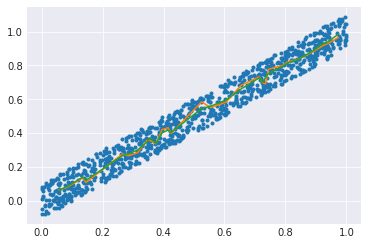

In [4]:
medx,medy,sig,count=binnedmedian(x,y,100,12)
meanx,meany,sig,count=binnedmean(x,y,100,12)

plt.plot(x,y,'.')
plt.plot(medx,medy)
plt.plot(meanx,meany)